In [1]:
import cv2

#### 이미지 불러오기

In [2]:
# imread() : 이미지를 읽어옴
# cv2.IMREAD_COLOR : 이미지를 칼라 이미지로 설정
jinro = cv2.imread("./data/jinro.jfif", cv2.IMREAD_COLOR)

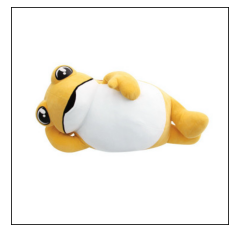

In [3]:
import matplotlib.pyplot as plt

# 눈금은 삭제
plt.xticks([])
plt.yticks([])
plt.imshow(jinro)

- OpenCV로 불러온 이미지가 matplotlib으로 출력할 때 색깔이 변경된다는 문제가 생김
  - OpenCV에서 사용하는 컬러 공간 : RGB- 색상의 파장에 따라 배치
  - Python에서 사용하는 칼라공간 : BGR- 알파벳으로 배치

- 이미지의 Red와 Blue를 변경 : cvtColor() 함수를 사용

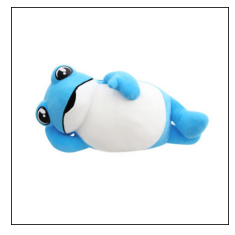

In [4]:
# cv2.COLOR_RGB2BGR : RGB -> BGR
jinro = cv2.cvtColor(jinro, cv2.COLOR_RGB2BGR)
plt.xticks([])
plt.yticks([])
plt.imshow(jinro)

#### 이미지처리에서 사용하는 색상
- Color 이미지 : RGB로 구성된 이미지
  - Red, Green, Blue 각각 8비트로 구성되어 있음(0-255)
  - 트루칼라 : 24비트
  - ARGB : Alpha(투명도)
  - RGB 칼라 색상의 단점 : 복잡, 빛에 의해 영향을 받음
- 흑백(gray) 이미지
  - RGB의 채널을 평균(R+G+B / 3)을 내서 하나의 채널의 채널 통합(0-255)
- 이진(binary) 이미지
  - 0과 255(1)로만 구성된 이미지

##### 흑백이미지로 변환
- 이미지를 읽을 때 흑백이미지로 읽는 방법(cv2.IMREAD_GRAYSCALE)
- 칼라 이미지로 읽어서 흑백이미지로 변환하는 방법(cv2.cvtColor())
  - 출력용으로 칼라 이미지가 필요한 경우

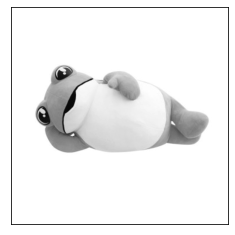

In [5]:
jinro_gray = cv2.imread("./data/jinro.jfif", cv2.IMREAD_GRAYSCALE)

plt.xticks([])
plt.yticks([])

# cmap = "gray" : 출력모드를 흑백으로 설정
plt.imshow(jinro_gray, cmap="gray")

- 칼라 이미지로 읽어서 흑백이미지로 변환하는 방법

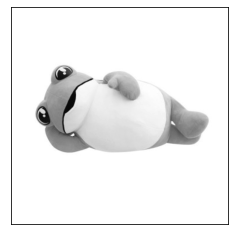

In [6]:
jinro = cv2.imread("./data/jinro.jfif", cv2.IMREAD_COLOR)

# BGR2GRAY : RGB -> BGR -> Gray
jinro_gray = cv2.cvtColor(jinro, cv2.COLOR_BGR2GRAY)
plt.xticks([])
plt.yticks([])
plt.imshow(jinro_gray, cmap="gray")

##### 이진 이미지로 변환하기
- 마스크 패턴을 생성, 이진 이미지 처리를 하는 경우
- 칼라 이미지를 gray 이미지로 변환한 후에 이진 이미지로 변환

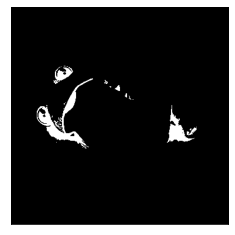

In [8]:
# threshold() : 흑백이미지를 이진 이미지로 변환하는 함수 ==> 임계치
# threshold(변환할 이미지, 기준값, 기준값에 따른 결과값, 변환방법)
# 만약 픽셀값이 128보다 크면 255로 값을 변경 (cv2.THRESH_BINARY)
# 만약 픽셀값이 128보다 작으면 0으로 값을 변경
# _ : threshold()는 리턴값이 2개 있는데 첫번째 리턴 값을 안받겠다는 의미
_, jinro_bin = cv2.threshold(jinro_gray, 128, 255, cv2.THRESH_BINARY_INV)
plt.xticks([])
plt.yticks([])
plt.imshow(jinro_bin, cmap="gray")

##### 동영상 파일을 가져오거나 카메라를 연동하기

In [19]:
import cv2
#VideoCapture() : 비디오 파일이나 카메라를 연동
cap = cv2.VideoCapture("./data/video.mp4")
# 카메라를 사용하는 경우
#cap = cv2.VideoCapture(0)

##### 연동한 카메라나 동영상으로부터 이미지를 읽어서 출력
- 초당 30장의 이미지 출력

In [4]:
while True : 
    # 비디오에서 이미지를 한장씩 가져온다
    # ret : 이미지를 잘 읽었으면 True를 반환
    # frame : 읽은 이미지가 저장
    ret, frame = cap.read()
    
    # 이미지를 읽지 못했거나 영상이 모두 실행된 경우 발생하는 오류에 따른 예외처리
    if not ret: # 이미지를 읽지 못했다면
        print("비디오 읽기 실패")
        cap.release() # 비디오 중지
        cv2.destroyAllWindows() # 띄운 새창을 모두 닫아준다
        break # while 반복문 중지
    # 읽은 이미지를 출력(새창을 띄워서 출력)
    cv2.imshow("video", frame)
    
    # 초당 30장의 이미지 출력되도록 함
    # 이미지 한장을 출력하고 33/1000초동안 키 입력을 대기
    key = cv2.waitKey(33)
    
    # 무한루프를 멈춰주는 기능
    if key == 49: # 아스키코드로 숫자 1을 의미
        cap.release() #비디오 중지
        cv2.destroyAllWindows # 띄운 새창을 모두 닫아준다
        break # 반복문 중지

##### 영상 녹화 기능 구현(CCTV 구현)

In [7]:
# 녹화 기능 설정(속도, 화면크기, 코덱)
# 속도(초당 몇 장의 이미지를 출력하게 할 것인지)
fps = 30.0

# 화면 크기
width = int(cap.get(3)) # 원 영상의 가로 크기를 실수로 가져온다
height = int(cap.get(4)) # 원 영상의 세로 크기를 실수로 가져온다

# 코덱 설정
codec = cv2.VideoWriter_fourcc(*"DIVX") # avi 파일 코덱

# 녹화 파일 설정 (파일명, 코덱, 속도, 화면 크기)
out = cv2.VideoWriter("./data/cctv.avi", codec, fps, (width, height))

In [20]:
record = False # 시작 시에는 녹화가 되지 않도록 설정
while True:
    ret, frame = cap.read()
    
    if not ret:
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("cctv", frame)
    
    if record:
        # 현재 이미지를 녹화 파일에 쓴다
        out.write(frame)
    key = cv2.waitKey(33)
    
    if key == 49:
        print("녹화 종료합니다")
        cap.release()
        cv2.destroyAllWindows()
        break
    if key == 50 : #숫자 2키를 누르면
        record = True #녹화가 가능하도록 설정
        

녹화 종요합니다
